#  代码优化后

In [1]:
from Model_block import Encode
from data_set import train_set
import torch
import torch.nn as nn
import numpy as np
from Task_block import contrastive_loss
from torch.utils.data import DataLoader
from Task_block import task_1
from tqdm import tqdm    # 进度条
from torch.optim.lr_scheduler import CosineAnnealingLR

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
train_data = train_set
train_loader = DataLoader(dataset=train_data, batch_size=1, shuffle=True)

In [4]:
train_model = Encode().to(device)
optimizer = torch.optim.Adam(train_model.parameters(), lr=0.001)  # 优化器
scheduler = CosineAnnealingLR(optimizer, T_max=10)  # 100epoch完成一个余弦周期

In [12]:
optimizer = torch.optim.Adam(train_model.parameters(), lr=0.0001)  # 优化器
scheduler = CosineAnnealingLR(optimizer, T_max=10)  # 100epoch完成一个余弦周期
num_epochs = 20
train_losses = []
# 训练阶段
train_model.train()
for epoch in range(num_epochs):
    train_loss = 0.0
    # 创建进度条
    progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for x in progress:
        # 前向传播
        x1 = x.squeeze(0)  # 输入 (8, 22, 512)
        x1 = x1.to(device)
        x2 = task_1(x1).to(device)
        output_1 = train_model(x1)
        output_2 = train_model(x2)
        loss = contrastive_loss(output_1, output_2).to(device)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # 更新进度条显示
        progress.set_postfix(loss=loss.item())
    scheduler.step()  # 更新学习率
    # 计算epoch平均损失
    epoch_train_loss = train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    print(f'Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}')

Epoch 1/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.31it/s, loss=0.625]


Epoch 1 - Train Loss: 0.6164


Epoch 2/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.04it/s, loss=0.629]


Epoch 2 - Train Loss: 0.6140


Epoch 3/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.12it/s, loss=0.644]


Epoch 3 - Train Loss: 0.6125


Epoch 4/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.26it/s, loss=0.613]


Epoch 4 - Train Loss: 0.6097


Epoch 5/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.12it/s, loss=0.596]


Epoch 5 - Train Loss: 0.6067


Epoch 6/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.05it/s, loss=0.578]


Epoch 6 - Train Loss: 0.6039


Epoch 7/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.23it/s, loss=0.586]


Epoch 7 - Train Loss: 0.6014


Epoch 8/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.32it/s, loss=0.599]


Epoch 8 - Train Loss: 0.5989


Epoch 9/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.07it/s, loss=0.596]


Epoch 9 - Train Loss: 0.5971


Epoch 10/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.13it/s, loss=0.6]  


Epoch 10 - Train Loss: 0.5962


Epoch 11/20: 100%|██████████| 1800/1800 [01:26<00:00, 20.72it/s, loss=0.648]


Epoch 11 - Train Loss: 0.5958


Epoch 12/20: 100%|██████████| 1800/1800 [01:27<00:00, 20.59it/s, loss=0.593]


Epoch 12 - Train Loss: 0.5960


Epoch 13/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.35it/s, loss=0.596]


Epoch 13 - Train Loss: 0.5969


Epoch 14/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.17it/s, loss=0.609]


Epoch 14 - Train Loss: 0.5980


Epoch 15/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.19it/s, loss=0.593]


Epoch 15 - Train Loss: 0.6000


Epoch 16/20: 100%|██████████| 1800/1800 [01:30<00:00, 19.96it/s, loss=0.595]


Epoch 16 - Train Loss: 0.6012


Epoch 17/20: 100%|██████████| 1800/1800 [01:31<00:00, 19.78it/s, loss=0.622]


Epoch 17 - Train Loss: 0.6030


Epoch 18/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.34it/s, loss=0.616]


Epoch 18 - Train Loss: 0.6043


Epoch 19/20: 100%|██████████| 1800/1800 [01:28<00:00, 20.39it/s, loss=0.622]


Epoch 19 - Train Loss: 0.6056


Epoch 20/20: 100%|██████████| 1800/1800 [01:29<00:00, 20.15it/s, loss=0.607]

Epoch 20 - Train Loss: 0.6061


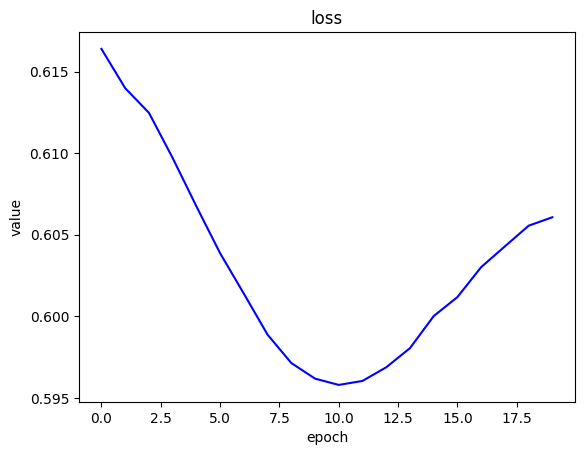

In [13]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.plot(train_losses, label='训练损失', color='blue')
# 添加标题和图例
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
# 显示图形
plt.show()

In [14]:
total_params = sum(p.numel() for p in train_model.parameters())
print(f"总参数量: {total_params:,}")  

总参数量: 79,674


In [15]:
torch.save(train_model.state_dict(), 'train_2_weights.pth')

### loss = 0.59 左右